Bumble Reviews Sentiment Analysis using Python

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [28]:
data = pd.read_csv("bumble_google_play_reviews.csv")

In [29]:
print(data.head())

                               reviewId          userName  \
0  64ffc774-5ef7-43d2-b90b-868716a6fde4  Richard Williams   
1  3ca06033-899b-445f-b3ea-3cba2c8d4e97      Muhammed Ali   
2  082f5ff2-f7c1-4e7e-918f-3c494683d652       Mike Flores   
3  7932ac8b-ca9f-416e-a745-a0e00fce36f0               Jay   
4  9bba7536-0a47-4af8-b53a-6e8839f44ed1              K. S   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AFdZu...   
1  https://play-lh.googleusercontent.com/a-/AFdZu...   
2  https://play-lh.googleusercontent.com/a-/AFdZu...   
3  https://play-lh.googleusercontent.com/a/AItbvm...   
4  https://play-lh.googleusercontent.com/a-/AFdZu...   

                                             content  score  thumbsUpCount  \
0  I'm new to this app I just installed it and I ...      1              0   
1  Intentionally misleading. App will notify you ...      1              0   
2  You only can swipe left or right a few times b...      1   

In [30]:
data = data[["content"]]

In [31]:
data.isnull().sum()

content    6
dtype: int64

In [32]:
data = data.dropna()

In [33]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


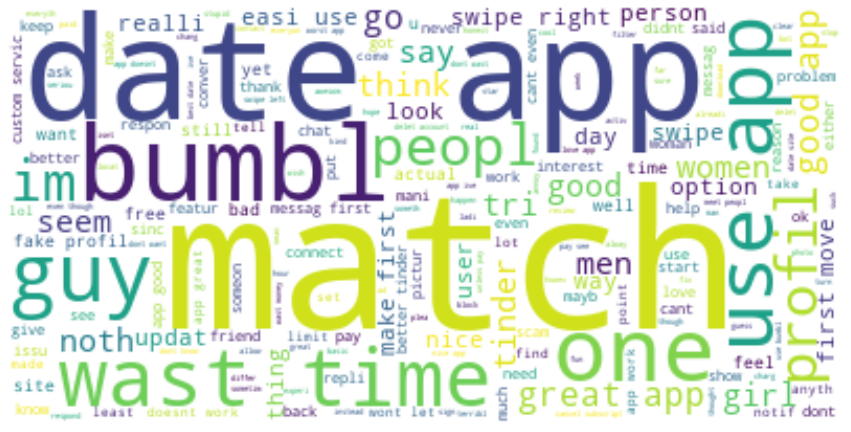

In [34]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0  im new app instal hope find new peopl caus ope...     0.345     0.000   
1  intent mislead app notifi new match unread mes...     0.000     0.000   
2  swipe left right time run like make app total ...     0.240     0.135   
3                                         app blows😂     0.000     0.000   
4                                           men free     0.767     0.000   

   Neutral  
0    0.655  
1    1.000  
2    0.625  
3    1.000  
4    0.233  


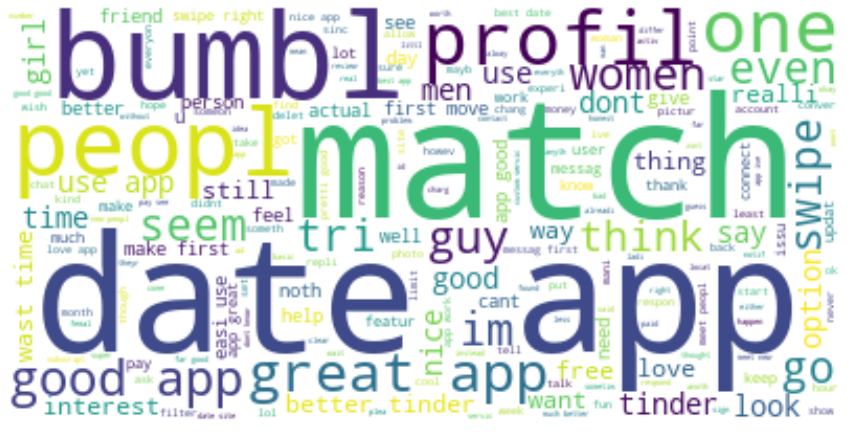

In [36]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

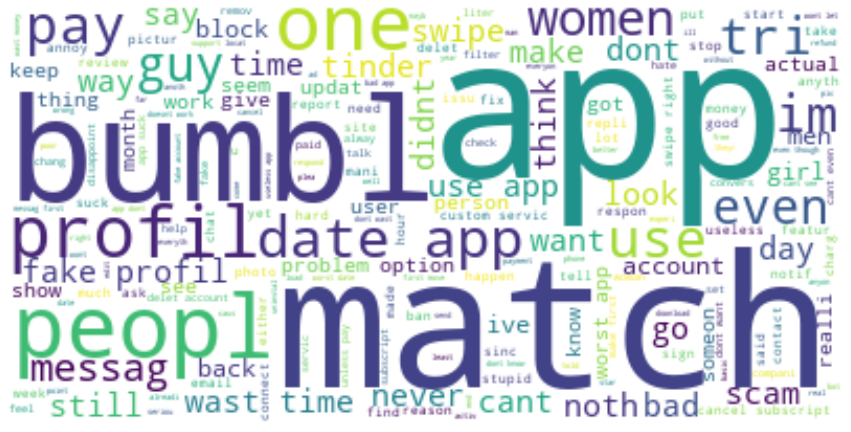

In [37]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [39]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  31148.19999999796
Negative:  11290.944000000045
Neutral:  71690.67200000859
